# Statistics Core Concepts

This notebook is for a revision of key statistical concepts such as summary statistics, random numbers and probability, More Distributions, the Central Limit Theorem, Correlation and Experimental Design

## Summary Statistics

Summary statistics are a way of summarising a set of data. They are useful for getting a quick overview of a set of data. They are also useful for comparing sets of data.

In [1]:
# Import libraries
import numpy as np
import pandas as pd
from pathlib import Path
import matplotlib.pyplot as plt
import seaborn as sns 
from scipy.stats import uniform # Import uniform from scipy.stats
from scipy.stats import binom #import binom from scipy.stats
from scipy.stats import norm #import normal distribution
from scipy.stats import poisson #import poisson distribution 
from scipy.stats import expon #import exponential distribution


data = Path('C:/Users/Abdul Rauf Maroof/OneDrive/Documents/MSBA/data_sets')
food_consumption = pd.read_csv(data/'food_consumption.csv',index_col=0)
amir_deals = pd.read_csv(data/'amir_deals.csv',index_col=0)
world_happiness = pd.read_csv(data/'world_happiness.csv',index_col=0)

### Measures of Center

Measures of Center are used to describe the central tendency of a distribution. The three most common measures of center are the mean, median, and mode. The mean is the average of a distribution, the median is the middle value of a distribution, and the mode is the most common value of a distribution. The mean is the most commonly used measure of center, but it is not always the best measure of center. The median is a better measure of center when there are outliers in the data. The mode is a better measure of center when the data is categorical.


In [27]:
usa_be_consumption = food_consumption[(food_consumption['country'] == 'USA') | (food_consumption['country'] == 'Belgium')]
usa_be_consumption.groupby('country')['consumption'].agg(['mean','median'])

,mean,median
country,,
Belgium,42.132727,12.59
USA,44.650000,14.58


mean      37.591615
median    15.200000
Name: co2_emission, dtype: float64


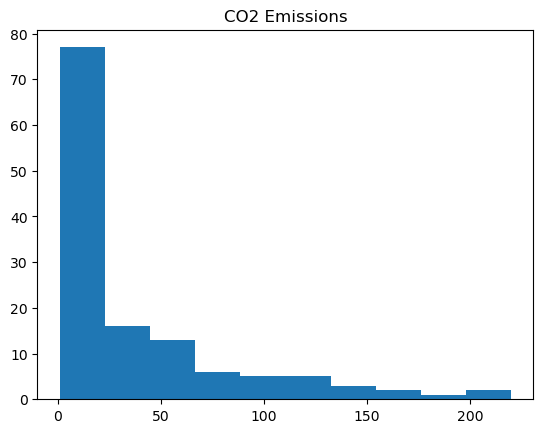

In [33]:
# Subset for food_category equals rice
rice_consumption = food_consumption[food_consumption.food_category == 'rice']
print(rice_consumption['co2_emission'].agg(['mean','median']))

# Histogram of co2_emission for rice and show plot
plt.hist(rice_consumption.co2_emission)
plt.title('CO2 Emissions')
plt.show()

### Measures of Spread

Measure of spread are important in understanding the variability of a distribution. The three most common measures of spread are the range, interquartile range, and standard deviation. The range is the difference between the largest and smallest values in a distribution. The interquartile range is the difference between the 75th percentile and the 25th percentile of a distribution. The standard deviation is a measure of how spread out the values in a distribution are. The standard deviation is the square root of the variance. The variance is the average of the squared differences between each value and the mean of the distribution. The standard deviation is the most commonly used measure of spread, but it is not always the best measure of spread. The interquartile range is a better measure of spread when there are outliers in the data.

In [36]:
# Calculate the quartiles of co2_emission
print(np.quantile(food_consumption.co2_emission, [0,0.25,0.5,0.75,1]))
# Calculate the quintiles of co2_emission
print(np.quantile(food_consumption.co2_emission, [0,0.20,0.4,0.6,0.8,1]))
# Calculate the deciles of co2_emission
print(np.quantile(food_consumption.co2_emission, [0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1]))

[   0.        5.21     16.53     62.5975 1712.    ]
[   0.       3.54    11.026   25.59    99.978 1712.   ]
[0.00000e+00 6.68000e-01 3.54000e+00 7.04000e+00 1.10260e+01 1.65300e+01
 2.55900e+01 4.42710e+01 9.99780e+01 2.03629e+02 1.71200e+03]


                        var         std
food_category                          
beef           88748.408132  297.906710
dairy          17671.891985  132.935669
eggs              21.371819    4.622966
fish             921.637349   30.358481
lamb_goat      16475.518363  128.356996
nuts              35.639652    5.969895
pork            3094.963537   55.632396
poultry          245.026801   15.653332
rice            2281.376243   47.763754
soybeans           0.879882    0.938020
wheat             71.023937    8.427570


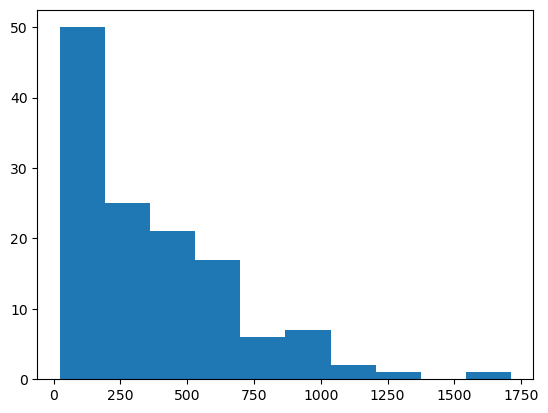

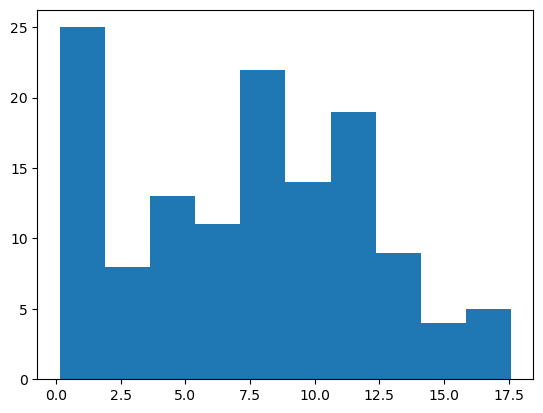

In [38]:
# Print variance and sd of co2_emission for each food_category
print(food_consumption.groupby('food_category')['co2_emission'].agg(['var','std']))
# Import matplotlib.pyplot with alias plt
import matplotlib.pyplot as plt
# Create histogram of co2_emission for food_category 'beef'
plt.hist(food_consumption[food_consumption.food_category == 'beef'].co2_emission)
# Show plot
plt.show()
# Create histogram of co2_emission for food_category 'eggs'
plt.hist(food_consumption[food_consumption.food_category == 'eggs'].co2_emission)
# Show plot
plt.show()

In [53]:
# Calculate total co2_emission per country: emissions_by_country
emissions_by_country = food_consumption.groupby('country')['co2_emission'].sum()

# Compute the first and third quantiles and IQR of emissions_by_country
q1 = np.quantile(emissions_by_country, 0.25)
q3 = np.quantile(emissions_by_country, 0.75)
iqr = q3 - q1

# Calculate the lower and upper cutoffs for outliers
lower = q1 - 1.5 * iqr
upper = q3 + 1.5 * iqr

# Subset emissions_by_country to find outliers
outliers = emissions_by_country[(emissions_by_country < lower) | (emissions_by_country > upper)]
print(outliers)

country
Argentina    2172.4
Name: co2_emission, dtype: float64


### Probability


In [62]:
# Count the deals for each product
counts = amir_deals['product'].value_counts()
print(counts,'\n')

# Calculate probability of picking a deal with each product
probs = round((counts / len(amir_deals)) * 100, 2)
print(probs)



Product B    62
Product D    40
Product A    23
Product C    15
Product F    11
Product H     8
Product I     7
Product E     5
Product N     3
Product G     2
Product J     2
Name: product, dtype: int64 

Product B    34.83
Product D    22.47
Product A    12.92
Product C     8.43
Product F     6.18
Product H     4.49
Product I     3.93
Product E     2.81
Product N     1.69
Product G     1.12
Product J     1.12
Name: product, dtype: float64


In [67]:
# Set random seed
np.random.seed(24)

# Sample 5 deals with replacement it is set to take sample without replacement by default
sample_without_replacement = amir_deals.sample(5, replace=True)
print(sample_without_replacement)

       product   client status   amount  num_users
163  Product D  Current    Won  6755.66         59
132  Product B  Current    Won  6872.29         25
88   Product C  Current    Won  3579.63          3
146  Product A  Current    Won  4682.94         63
146  Product A  Current    Won  4682.94         63


### Discrete Distributions

Discrete distributions are distributions where the possible values are countable. The most common discrete distributions are the binomial distribution, the geometric distribution, and the Poisson distribution.

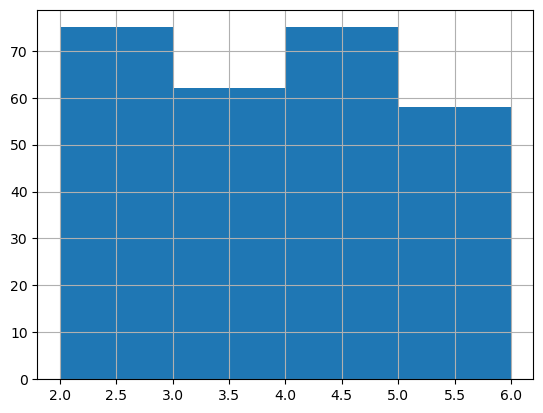

0.6769230769230767


In [89]:
# Create a histogram of restaurant_groups and show plot
food_consumption['consumption'].hist(bins = [2, 3, 4, 5, 6])
plt.show()

size_dist = food_consumption['consumption'].value_counts() / len(food_consumption)
size_dist = size_dist.sort_index(ascending=True)
size_dist

# Reset index and rename columns
size_dist = size_dist.reset_index()
size_dist.columns = ['group_size', 'prob']  

# Expected value
expected_value = np.sum(size_dist['group_size'] * size_dist['prob'])

# Subset groups of size 4 or more
groups_4_or_more = size_dist[size_dist['group_size'] >= 4]

# Sum the probabilities of groups_4_or_more
prob_4_or_more = np.sum(groups_4_or_more['prob'])
print(prob_4_or_more)

### Continous Distributions

Continous distributions are distributions where the possible values are not countable. The most common continous distributions are the uniform distribution, the normal distribution, and the exponential distribution.

In [94]:
# Unifrom Continous Distribution

# Min and max wait times for back-up that happens every 30 min
min_time = 0
max_time = 30

# Calculate probability of waiting less than 5 mins
prob_less_than_5 = uniform.cdf(5, min_time, max_time)
print(prob_less_than_5,'\n')

# Calculate probability of waiting more than 5 mins
prob_more_than_5 = 1 - uniform.cdf(5, min_time, max_time)
print(prob_more_than_5,'\n')

# Calculate probability of waiting 10-20 mins
prob_between_10_and_20 = uniform.cdf(20, min_time, max_time) - uniform.cdf(10, min_time, max_time)
print(prob_between_10_and_20,'\n')

0.16666666666666666 

0.8333333333333334 

0.3333333333333333 



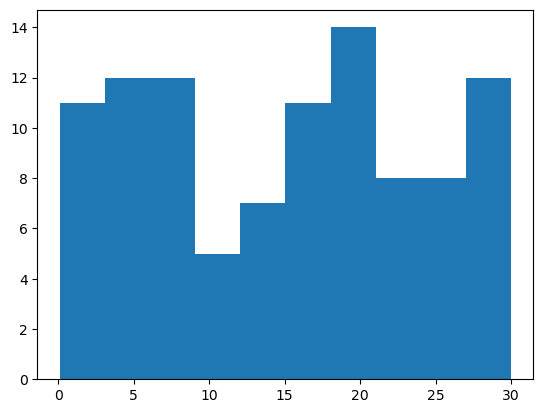

In [97]:
# Set random seed to 334
np.random.seed(334)

wait_time = uniform.rvs(0,30,size=100)
plt.hist(wait_time)
plt.show()

Binomial Distribution - The binomial distribution is a discrete distribution that describes the probability of a certain number of successes in a sequence of independent experiments. The binomial distribution is parameterized by two values, n and p. n is the number of trials in the experiment, and p is the probability of success in each trial. The binomial distribution is defined by the following formula:

$$P(X=k) = \binom{n}{k}p^k(1-p)^{n-k}$$

where k is the number of successes in the experiment.

In [118]:
# Binomial Distribution
np.random.seed(10)  

# Simulate 52 weeks of 3 deals
deals = binom.rvs(3, 0.3, size = 52)

# Print mean deals won per week
print(f'Mean of deals won per week: {np.mean(deals)}','\n')

# Probability of closing 3 out of 3 deals
prob_3 = binom.pmf(3, 3, 0.3)
print(f'Probability of closing 3 out 3 deals per week: {prob_3}','\n')

# Probability of closing <= 1 deal out of 3 deals
prob_less_than_or_equal_1 = binom.cdf(1, 3, 0.3)

print(f"Probability of closing 1 or less than one deal in a week: {prob_less_than_or_equal_1}",'\n')

# Probability of closing > 1 deal out of 3 deals
prob_greater_than_1 = 1 - binom.cdf(1, 3, 0.3)

print(f'Probability of closing more than 1 deal in a week: {prob_greater_than_1}')

Mean of deals won per week: 0.8269230769230769 

Probability of closing 3 out 3 deals per week: 0.026999999999999996 

Probability of closing 1 or less than one deal in a week: 0.784 

Probability of closing more than 1 deal in a week: 0.21599999999999997


In [130]:
# Expected number won with 30% win rate
won_30pct = 3 * 0.3
print(f'Closes {won_30pct}% of deals')

# Expected number won with 25% win rate
won_25pct = 3 * 0.25
print(f'Closes {won_25pct}% of deals')

# Expected number won with 35% win rate
won_35pct = 3 * 0.35
print(f'Closes {won_35pct}% of deals')

Closes 0.8999999999999999% of deals
Closes 0.75% of deals
Closes 1.0499999999999998% of deals


### Histograms

Histograms are a way of visualizing the distribution of a set of data. A histogram is a bar graph where the height of each bar represents the frequency of the data in that range. The width of each bar represents the range of the data in that bar. The x-axis of a histogram represents the range of the data, and the y-axis represents the frequency of the data in that range.

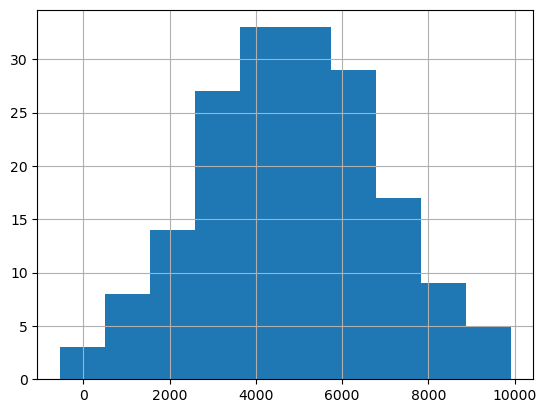

0.8943502263331446
0.9772498680518208
0.6826894921370859
3651.0204996078364


In [138]:
# Histogram of amount with 10 bins and show plot
amir_deals['amount'].hist(bins = 10)
plt.show()

# Probability of deal < 7500
prob_less_7500 = norm.cdf(7500, 5000, 2000)
print(prob_less_7500)

# Probability of deal > 1000
prob_over_1000 = 1 - norm.cdf(1000, 5000, 2000)
print(prob_over_1000)

# Probability of deal between 3000 and 7000
prob_3000_to_7000 = norm.cdf(7000, 5000, 2000) - norm.cdf(3000, 5000, 2000)
print(prob_3000_to_7000)

# Calculate amount that 25% of deals will be less than
pct_25 = norm.ppf(0.25, 5000, 2000)

print(pct_25)

### Normal Distribution

The normal distribution is a continous distribution that is defined by a mean and a standard deviation. The normal distribution is defined by the following formula:

$$f(x) = \frac{1}{\sigma\sqrt{2\pi}}e^{-\frac{(x-\mu)^2}{2\sigma^2}}$$

where $\mu$ is the mean of the distribution, $\sigma$ is the standard deviation of the distribution, and x is the value of the distribution. The normal distribution is also known as the Gaussian distribution. 

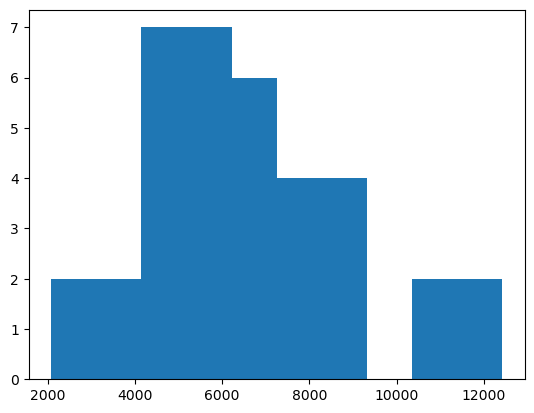

In [139]:
# Calculate new average amount
new_mean = 5000 * 1.2

# Calculate new standard deviation
new_sd = 2000 * 1.3

# Simulate 36 new sales
new_sales = norm.rvs(new_mean, new_sd, size = 36)

# Create histogram and show
plt.hist(new_sales)
plt.show()

32.0
List of means: 
[31.35, 45.05, 33.55, 38.15, 50.85, 31.85, 34.65, 36.25, 38.9, 44.05, 35.45, 37.6, 37.95, 28.85, 33.3, 31.65, 45.5, 43.2, 24.4, 41.05, 37.2, 39.3, 29.45, 33.55, 45.3, 45.1, 30.95, 36.25, 37.65, 42.55, 34.55, 41.1, 36.9, 42.45, 38.45, 45.9, 42.7, 38.4, 32.55, 30.25, 38.0, 38.75, 49.3, 39.55, 49.05, 42.05, 41.0, 40.6, 58.25, 34.55, 51.2, 34.15, 36.95, 42.45, 41.85, 33.2, 36.15, 37.55, 34.2, 29.75, 42.35, 43.75, 29.0, 32.05, 31.65, 44.6, 30.85, 29.6, 37.7, 33.1, 36.35, 40.65, 45.7, 33.8, 40.1, 39.9, 33.5, 32.65, 32.85, 42.85, 35.4, 31.7, 32.0, 33.85, 36.6, 44.35, 39.9, 37.0, 37.3, 42.5, 38.35, 42.8, 44.55, 30.3, 50.45, 42.35, 40.65, 29.85, 39.3, 33.1] 



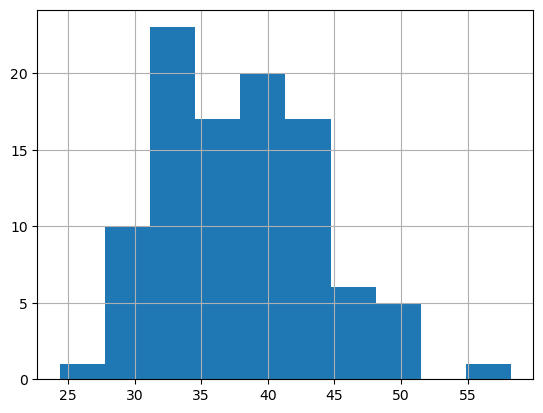

In [145]:
# Set seed to 104
np.random.seed(104)

# Sample 20 num_users with replacement from amir_deals
samp_20 = amir_deals['num_users'].sample(20, replace = True)

# Take mean of samp_20
print(np.mean(samp_20))

sample_means = []
# Loop 100 times
for i in range(100):
  # Take sample of 20 num_users
  samp_20 = amir_deals['num_users'].sample(20, replace=True)
  # Calculate mean of samp_20
  samp_20_mean = np.mean(samp_20)
  # Append samp_20_mean to sample_means
  sample_means.append(samp_20_mean)
print(f'List of means: \n{sample_means}','\n')

# Convert to Series and plot histogram
sample_means_series = pd.Series(sample_means)
sample_means_series.hist()
# Show plot
plt.show()

In [151]:
# Set seed to 321
np.random.seed(321)

sample_means = []
# Loop 30 times to take 30 means
for i in range(30):
#   Take sample of size 20 from num_users col of all_deals with replacement
  cur_sample = amir_deals['num_users'].sample(20, replace=True)
  # Take mean of cur_sample
  cur_mean = np.mean(cur_sample)
  # Append cur_mean to sample_means
  sample_means.append(cur_mean)

# Print mean of sample_means
print(np.mean(sample_means))

# Print mean of num_users in amir_deals
print(np.mean(amir_deals['num_users']))

# Based on the calculation we can see how the central limit theorem works

38.821666666666665
37.651685393258425


### Poison Distribtuion

The Poisson distribution is a discrete distribution that describes the probability of a certain number of events occurring in a fixed interval of time or space. The Poisson distribution is parameterized by one value, $\lambda$. $\lambda$ is the average number of events that occur in the interval. The Poisson distribution is defined by the following formula:

$$P(X=k) = \frac{\lambda^ke^{-\lambda}}{k!}$$

where k is the number of events that occur in the interval.

In [162]:
# Probability of 5 responses
prob_5 = poisson.pmf(5, 4)
print(f'Amir responds to 5 leads if he responds to 4 leads on average: {prob_5}')

# Probability of 5 responses
prob_coworker = poisson.pmf(5, 5.5)
print(f"Amir's coworker responds to 5 leads if he responds to 5.5 leads on average: {prob_coworker}")

# Probability of 2 or fewer responses
prob_2_or_less = poisson.cdf(2, 4)
print(f"Amir's coworker responds to 2 leads if he responds to 4 leads on average: {prob_2_or_less}")

# Probability of 10 or fewer responses
prob_10_or_more = 1 -  poisson.cdf(10, 4)
print(f"Amir's coworker responds to 10 leads if he responds to 4 leads on average: {prob_10_or_more}")

Amir responds to 5 leads if he responds to 4 leads on average: 0.1562934518505317
Amir's coworker responds to 5 leads if he responds to 5.5 leads on average: 0.17140068409793663
Amir's coworker responds to 2 leads if he responds to 4 leads on average: 0.23810330555354436
Amir's coworker responds to 10 leads if he responds to 4 leads on average: 0.0028397661205137315


### Exponential Distribution

The exponential distribution is a continous distribution that describes the probability of a certain amount of time passing before an event occurs. The exponential distribution is parameterized by one value, $\lambda$. $\lambda$ is the average rate of the event. The exponential distribution is defined by the following formula:

$$f(x) = \lambda e^{-\lambda x}$$

where x is the amount of time that has passed.

In [167]:
# Print probability response takes < 1 hour
print(f"The probability that Amir takes less than an hour is: {expon.cdf(1, scale=2.5)}")

# Print probability response takes > 4 hours
print(f"The probability that Amir takes more than 4 hour is: {1 - expon.cdf(4, scale=2.5)}")

# Print probability response takes 3-4 hours
print(f"The probability that Amir takes more than 3 to 4 hour is: {expon.cdf(4, scale = 2.5) - expon.cdf(3, scale = 2.5)}")

The probability that Amir takes less than an hour is: 0.3296799539643607
The probability that Amir takes more than 4 hour is: 0.20189651799465536
The probability that Amir takes more than 3 to 4 hour is: 0.09929769391754684


## Correlation

Correlation is a measure of how closely two variables are related. Correlation is a value between -1 and 1. A correlation of 1 means that the two variables are perfectly positively correlated. A correlation of -1 means that the two variables are perfectly negatively correlated. A correlation of 0 means that the two variables are not correlated at all. Correlation is a useful tool for understanding the relationship between two variables. Correlation is not causation. Just because two variables are correlated does not mean that one causes the other.

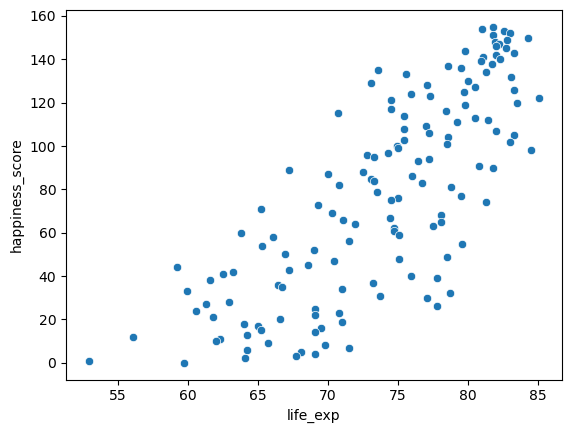

0.7802249053272062


In [174]:
# Create a scatterplot of happiness_score vs. life_exp and show
sns.scatterplot(x='life_exp', y='happiness_score', data=world_happiness, ci=None)
plt.show()

# Correlation between life_exp and happiness_score
cor = world_happiness['life_exp'].corr(world_happiness['happiness_score'])

print(cor)

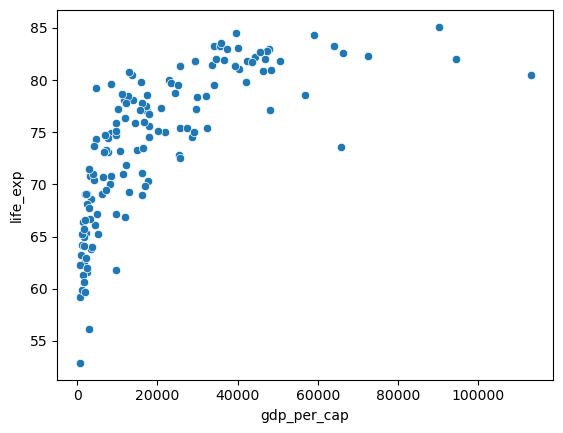

0.7019547642148012


In [176]:
sns.scatterplot(y='life_exp',x='gdp_per_cap',data=world_happiness)
plt.show()
cor = world_happiness['gdp_per_cap'].corr(world_happiness['life_exp'])
print(cor)

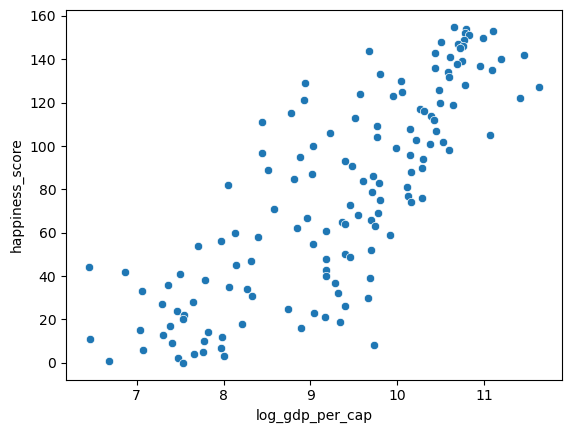

0.8043146004918288
Index(['Unnamed: 0', 'country', 'social_support', 'freedom', 'corruption',
       'generosity', 'gdp_per_cap', 'life_exp', 'happiness_score',
       'log_gdp_per_cap'],
      dtype='object')


In [180]:
# When variables have skewed distributions, they often require a transformation in order to form a linear relationship with another variable
# so that correlation can be computed.

# Create log_gdp_per_cap column
world_happiness['log_gdp_per_cap'] = np.log(world_happiness['gdp_per_cap'])
# Scatterplot of happiness_score vs. gdp_per_cap
sns.scatterplot(x='log_gdp_per_cap',y='happiness_score',data=world_happiness)
plt.show()
# Calculate correlation
cor = world_happiness['log_gdp_per_cap'].corr(world_happiness['happiness_score'])
print(cor)
print(world_happiness.columns)